## **Assesing the Evaluation Metrics for Text Summarization**

### **1. Abstract**
This notebook helps answer the problem of choosing the right evaluation metric for text summarization tasks. Few of the popular metrics have been chosen and assesed on how they performed on different text summaries.


### **2. Installing Dependencies and Importing Libraries**

In [81]:
#!pip install sentencepiece bert-score transformers datasets rouge_score

In [80]:
#pip install -U nltk

In [3]:
from transformers import pipeline
import pandas as pd
from datasets import load_metric

### **3. Loading Data**

In [4]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
import zipfile
with zipfile.ZipFile('/gdrive/MyDrive/CNN DailyMail Dataset/archive (6).zip', 'r') as zip_ref:
    zip_ref.extractall('gdrive/MyDrive/')
dataset = pd.read_csv("/content/gdrive/MyDrive/cnn_dailymail/test.csv")
dataset.head(1)

Mounted at /gdrive


,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...


### **4. Summarizing a news article** <br>
Using Huggingface Transformer's pipeline method to perform summarization task using a BART model trained on CNN articles. Then generating the summary for the selected article.

In [5]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summary = summarizer(dataset.article[8458])[0]['summary_text']

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Original article accompained with human genrated reference and BART generated summary

In [6]:
print("Original Article")
print(dataset.article[8458])
print()
print("Human generated summary/ Golden Reference")
print(dataset.highlights[8458])
print()
print("Machine Summary/ Candidate")
print(summary)

Original Article
Dan Price, the CEO of Gravity Payments, is slashing his own salary 93percent . The CEO of a Seattle startup has instituted a $70,000 minimum wage at his credit card processing company - and he's paying for it by slashing his $1million salary to the same as his lowest-paid worker. He's also taking up to 80percent of the firm's $2.2million expected profit to plow it back in to staff salaries. Over the next three years, Gravity Payments will offer at least $70,000 salary to all of its 120 employees - even the most junior customer service representatives and clerks, CEO Dan Price told the New York Times this week. 'Is anyone else freaking out right now? I’m kind of freaking out,' he told his cheering employees at a meeting on Monday afternoon. The policy will raise the wages for 70 of the company's workers - more than half the staff. The Times was present at Price's announcement. Even if the $70,000 minimum wage is a publicity stunt, it's one that will cost him big time. P

### **4. Evaluating the BART summary**
Loading the metrics that we are going to assess

In [7]:
from datasets import load_metric
rouge_metric = load_metric('rouge')
bleu_metric = load_metric('bleu')
meteor_metric = load_metric('meteor')
bertscore_metric = load_metric('bertscore')

Downloading:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.49k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Downloading:   0%|          | 0.00/2.93k [00:00<?, ?B/s]

In [8]:
results_rouge=rouge_metric.compute(predictions=[summary],references=[dataset.highlights[8458]])

In [9]:
print("ROUGE-1 Score:")
print(results_rouge["rouge1"])
print("ROUGE-2 Score:")
print(results_rouge["rouge2"])
print("ROUGE-L Score:")
print(results_rouge["rougeL"])
print("ROUGE-LSum Score:")
print(results_rouge["rougeLsum"])

ROUGE-1 Score:
AggregateScore(low=Score(precision=0.5714285714285714, recall=0.547945205479452, fmeasure=0.5594405594405595), mid=Score(precision=0.5714285714285714, recall=0.547945205479452, fmeasure=0.5594405594405595), high=Score(precision=0.5714285714285714, recall=0.547945205479452, fmeasure=0.5594405594405595))
ROUGE-2 Score:
AggregateScore(low=Score(precision=0.2318840579710145, recall=0.2222222222222222, fmeasure=0.22695035460992907), mid=Score(precision=0.2318840579710145, recall=0.2222222222222222, fmeasure=0.22695035460992907), high=Score(precision=0.2318840579710145, recall=0.2222222222222222, fmeasure=0.22695035460992907))
ROUGE-L Score:
AggregateScore(low=Score(precision=0.3, recall=0.2876712328767123, fmeasure=0.2937062937062937), mid=Score(precision=0.3, recall=0.2876712328767123, fmeasure=0.2937062937062937), high=Score(precision=0.3, recall=0.2876712328767123, fmeasure=0.2937062937062937))
ROUGE-LSum Score:
AggregateScore(low=Score(precision=0.4, recall=0.383561643835

In [10]:
results_bleu = bleu_metric.compute(predictions=[summary.split()],references=[[dataset.highlights[8458].split()]])
results_bleu

{'bleu': 0.10225026454683218,
 'brevity_penalty': 0.9270409165125936,
 'length_ratio': 0.9295774647887324,
 'precisions': [0.48484848484848486,
  0.15384615384615385,
  0.0625,
  0.031746031746031744],
 'reference_length': 71,
 'translation_length': 66}

In [11]:
results_meteor = meteor_metric.compute(predictions=[[summary]],references=[[dataset.highlights[8458]]])
results_meteor

{'meteor': 0.4904703619513901}

In [12]:
results_bertscore = bertscore_metric.compute(predictions=[summary],references=[dataset.highlights[8458]],lang='en')
results_bertscore

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

{'f1': [0.9044607877731323],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.11(hug_trans=4.14.1)',
 'precision': [0.9061899781227112],
 'recall': [0.9027382135391235]}

### **4. Assesing the Metrics**

We manipulate the BART generated summary and generate 5 new summaries on which we compute the chosen evaluation metrics against the human generated reference and see how they react to evaluate them. We manipulate the summaries by - Synonymization of words, re-ordering the words, changing the facts, introducing grammatical mistakes and paraphrasing.

#### **4.1. Metrics after replacing few words with their synonyms**

We substituted the following words with their respective synonyms - <br>
slashing -> cutting <br>
plow it back -> reinvest it <br>
offer -> provide <br>
firm -> companies <br>
employees -> workers  <br>
salary -> compensation

In [152]:
syn_summary = """Gravity Payments CEO Dan Price is cutting his $1million compensation to the same as his lowest-paid worker. 
He's also taking up to 80percent of the coompany's $2.2million expected profit to reinvest it in to staff compensation. 
Over the next three years, Gravity Payments will provide at least $70,000 compensation to all of its 120 workers - even the most junior customer service representatives and clerks."""

In [153]:
syn_results_rouge=rouge_metric.compute(predictions=[syn_summary],references=[dataset.highlights[8458]])
syn_results_bleu = bleu_metric.compute(predictions=[syn_summary.split()],references=[[dataset.highlights[8458].split()]])
syn_results_meteor = meteor_metric.compute(predictions=[[syn_summary]],references=[[dataset.highlights[8458]]])
syn_results_bertscore = bertscore_metric.compute(predictions=[syn_summary],references=[dataset.highlights[8458]],lang='en')

print("Rouge score after swapping words with its synonyms")
print(syn_results_rouge)
print("BLEU score after swapping words with its synonyms")
print(syn_results_bleu)
print("METEOR score after swapping words with its synonyms")
print(syn_results_meteor)
print("BertScore after swapping words with its synonyms")
print(syn_results_bertscore)

Rouge score after swapping words with its synonyms
{'rouge1': AggregateScore(low=Score(precision=0.4927536231884058, recall=0.4657534246575342, fmeasure=0.4788732394366197), mid=Score(precision=0.4927536231884058, recall=0.4657534246575342, fmeasure=0.4788732394366197), high=Score(precision=0.4927536231884058, recall=0.4657534246575342, fmeasure=0.4788732394366197)), 'rouge2': AggregateScore(low=Score(precision=0.17647058823529413, recall=0.16666666666666666, fmeasure=0.17142857142857143), mid=Score(precision=0.17647058823529413, recall=0.16666666666666666, fmeasure=0.17142857142857143), high=Score(precision=0.17647058823529413, recall=0.16666666666666666, fmeasure=0.17142857142857143)), 'rougeL': AggregateScore(low=Score(precision=0.2608695652173913, recall=0.2465753424657534, fmeasure=0.25352112676056343), mid=Score(precision=0.2608695652173913, recall=0.2465753424657534, fmeasure=0.25352112676056343), high=Score(precision=0.2608695652173913, recall=0.2465753424657534, fmeasure=0.253

In [154]:
syn_results_rouge['rougeL'].mid.fmeasure

0.25352112676056343

#### **4.2. Metrics after randomly re-ordering the words**

We randomly made a new summary by disordering the words. The summary then becomes meaningless but the words and the number of words that the summary contain is the same. 

In [123]:
orderchange_summary="""Gravity Payments is CEO Dan Price slashing his $1million as his lowest-paid worker salary to the same. 
He's also taking up to it back expected profit 80percent of the firm's $2.2million to plow in to staff salaries. 
Over the next three years, Gravity Payments will offer at least $70,000 salary to all of its 120 employees - junior the most customer service representatives even and clerks."""

In [124]:
ord_results_rouge= rouge_metric.compute(predictions=[orderchange_summary],references=[dataset.highlights[8458]])
ord_results_bleu = bleu_metric.compute(predictions=[orderchange_summary.split()],references=[[dataset.highlights[8458].split()]])
ord_results_meteor = meteor_metric.compute(predictions=[[orderchange_summary]],references=[[dataset.highlights[8458]]])
ord_results_bertscore = bertscore_metric.compute(predictions=[orderchange_summary],references=[dataset.highlights[8458]],lang='en')

print("Rouge score after changing the order of words")
print(ord_results_rouge)
print("BLEU score after changing the order of words")
print(ord_results_bleu)
print("METEOR score after changing the order of words")
print(ord_results_meteor)
print("BertScore after changing the order of words")
print(ord_results_bertscore) 

Rouge score after changing the order of words
{'rouge1': AggregateScore(low=Score(precision=0.5714285714285714, recall=0.547945205479452, fmeasure=0.5594405594405595), mid=Score(precision=0.5714285714285714, recall=0.547945205479452, fmeasure=0.5594405594405595), high=Score(precision=0.5714285714285714, recall=0.547945205479452, fmeasure=0.5594405594405595)), 'rouge2': AggregateScore(low=Score(precision=0.21739130434782608, recall=0.20833333333333334, fmeasure=0.2127659574468085), mid=Score(precision=0.21739130434782608, recall=0.20833333333333334, fmeasure=0.2127659574468085), high=Score(precision=0.21739130434782608, recall=0.20833333333333334, fmeasure=0.2127659574468085)), 'rougeL': AggregateScore(low=Score(precision=0.2714285714285714, recall=0.2602739726027397, fmeasure=0.26573426573426573), mid=Score(precision=0.2714285714285714, recall=0.2602739726027397, fmeasure=0.26573426573426573), high=Score(precision=0.2714285714285714, recall=0.2602739726027397, fmeasure=0.26573426573426

80 to 60 , 2.2 to 100.2, 120 to 12000, not, 1 to 100, all to none, junior to senior, taking to not taking,

#### **4.3. Metrics after changing the facts of the summary**
We produce another summary by distorting the facts. We changed all the numbers and also replaced some words with their antonyms. Ex: We changed the words  - <br>
all -> none <br>
junior -> senior <br>
taking -> not taking <br>
slashing -> not slashing <br>

In [18]:
misfact_summary="""Gravity Payments CEO Dan Price is not slashing his $100million salary to the same as his lowest-paid worker. 
He's also not taking up to 60percent of the firm's $100.2million expected profit to plow it back in to staff salaries. 
Over the next three years, Gravity Payments will offer at least $20,000 salary to none of its 12000 employees - even the most senior customer service representatives and clerks."""

In [19]:
misfact_results_rouge= rouge_metric.compute(predictions=[misfact_summary],references=[dataset.highlights[8458]])
misfact_results_bleu = bleu_metric.compute(predictions=[misfact_summary.split()],references=[[dataset.highlights[8458].split()]])
misfact_results_meteor = meteor_metric.compute(predictions=[[misfact_summary]],references=[[dataset.highlights[8458]]])
misfact_results_bertscore = bertscore_metric.compute(predictions=[misfact_summary],references=[dataset.highlights[8458]],lang='en')

print("Rouge score with factual mistakes")
print(misfact_results_rouge)
print("BLEU score with factual mistakes")
print(misfact_results_bleu)
print("METEOR score with factual mistakes")
print(misfact_results_meteor)
print("BertScore with factual mistakes")
print(misfact_results_bertscore)

Rouge score with factual mistakes
{'rouge1': AggregateScore(low=Score(precision=0.5, recall=0.4931506849315068, fmeasure=0.496551724137931), mid=Score(precision=0.5, recall=0.4931506849315068, fmeasure=0.496551724137931), high=Score(precision=0.5, recall=0.4931506849315068, fmeasure=0.496551724137931)), 'rouge2': AggregateScore(low=Score(precision=0.14084507042253522, recall=0.1388888888888889, fmeasure=0.13986013986013987), mid=Score(precision=0.14084507042253522, recall=0.1388888888888889, fmeasure=0.13986013986013987), high=Score(precision=0.14084507042253522, recall=0.1388888888888889, fmeasure=0.13986013986013987)), 'rougeL': AggregateScore(low=Score(precision=0.25, recall=0.2465753424657534, fmeasure=0.2482758620689655), mid=Score(precision=0.25, recall=0.2465753424657534, fmeasure=0.2482758620689655), high=Score(precision=0.25, recall=0.2465753424657534, fmeasure=0.2482758620689655)), 'rougeLsum': AggregateScore(low=Score(precision=0.4166666666666667, recall=0.410958904109589, f

1st line -- is to are , to to for, his to her
2nd line -- taking - took, to to too, it to them
3rdline -- at least to atleast
Sentence capitals to small

#### **4.4. Metrics after introducing grammatical mistakes**
We made another summary by introducing grammatical mistakes. We did so by the changinging the capital letters to small and also changing the words - 
is -> are <br>
to -> for <br>
 his -> her <br>
taking -> took <br>
to -> too <br>
it -> them <br>
at least -> atleast

In [21]:
ungramm_summary="""Gravity Payments CEO dan price are slashing his $1million salary for the same as her lowest-paid worker.
 he's also took up too 80percent of the firm's $2.2million expected profit to plow them back in to staff salaries. 
 over the next three years, Gravity Payments will offer atleast $70,000 salary to all of its 120 employees - even the most junior customer service representatives and clerks."""

In [22]:
ungramm_results_rouge= rouge_metric.compute(predictions=[ungramm_summary],references=[dataset.highlights[8458]])
ungramm_results_bleu = bleu_metric.compute(predictions=[ungramm_summary.split()],references=[[dataset.highlights[8458].split()]])
ungramm_results_meteor = meteor_metric.compute(predictions=[[ungramm_summary]],references=[[dataset.highlights[8458]]])
ungramm_results_bertscore = bertscore_metric.compute(predictions=[ungramm_summary],references=[dataset.highlights[8458]],lang='en')

print("Rouge score with grammatical errors")
print(ungramm_results_rouge)
print("BLEU score with grammatical errors")
print(ungramm_results_bleu)
print("METEOR score with grammatical errors")
print(ungramm_results_meteor)
print("BertScore with grammatical errors")
print(ungramm_results_bertscore)

Rouge score with grammatical errors
{'rouge1': AggregateScore(low=Score(precision=0.5507246376811594, recall=0.5205479452054794, fmeasure=0.5352112676056338), mid=Score(precision=0.5507246376811594, recall=0.5205479452054794, fmeasure=0.5352112676056338), high=Score(precision=0.5507246376811594, recall=0.5205479452054794, fmeasure=0.5352112676056338)), 'rouge2': AggregateScore(low=Score(precision=0.20588235294117646, recall=0.19444444444444445, fmeasure=0.19999999999999998), mid=Score(precision=0.20588235294117646, recall=0.19444444444444445, fmeasure=0.19999999999999998), high=Score(precision=0.20588235294117646, recall=0.19444444444444445, fmeasure=0.19999999999999998)), 'rougeL': AggregateScore(low=Score(precision=0.2753623188405797, recall=0.2602739726027397, fmeasure=0.2676056338028169), mid=Score(precision=0.2753623188405797, recall=0.2602739726027397, fmeasure=0.2676056338028169), high=Score(precision=0.2753623188405797, recall=0.2602739726027397, fmeasure=0.2676056338028169)), 

#### **4.5. Metrics for paraphrased summary**
We produced semmantically and factually correct paraphrased summary and evaluated it.

In [132]:
semacc_summary = """CEO of Gravaity payments,Dan Price, is taking a pay cut to match the pay rate of his employees. 
He is also re-investing the comapany's 80percent of profit into staff salaries. For the next three years, 
Gravity Installments will offer at slightest $70,000 compensation to all of its 120 workers - including the most junior customer service representatives and clerks.
He was motivated after reading about how increase in the salary raises the happiness levels in people"""

In [133]:
semacc_results_rouge= rouge_metric.compute(predictions=[semacc_summary],references=[dataset.highlights[8458]])
semacc_results_bleu = bleu_metric.compute(predictions=[semacc_summary.split()],references=[[dataset.highlights[8458].split()]])
semacc_results_meteor = meteor_metric.compute(predictions=[[semacc_summary]],references=[[dataset.highlights[8458]]])
semacc_results_bertscore = bertscore_metric.compute(predictions=[semacc_summary],references=[dataset.highlights[8458]],lang='en')

print("Rouge score for paraphrased summary")
print(semacc_results_rouge)
print("BLEU score for paraphrased summary")
print(semacc_results_bleu)
print("METEOR score for paraphrased summary")
print(semacc_results_meteor)
print("BertScore for paraphrased summary")
print(semacc_results_bertscore)

Rouge score for paraphrased summary
{'rouge1': AggregateScore(low=Score(precision=0.46835443037974683, recall=0.5068493150684932, fmeasure=0.4868421052631579), mid=Score(precision=0.46835443037974683, recall=0.5068493150684932, fmeasure=0.4868421052631579), high=Score(precision=0.46835443037974683, recall=0.5068493150684932, fmeasure=0.4868421052631579)), 'rouge2': AggregateScore(low=Score(precision=0.1282051282051282, recall=0.1388888888888889, fmeasure=0.13333333333333333), mid=Score(precision=0.1282051282051282, recall=0.1388888888888889, fmeasure=0.13333333333333333), high=Score(precision=0.1282051282051282, recall=0.1388888888888889, fmeasure=0.13333333333333333)), 'rougeL': AggregateScore(low=Score(precision=0.25316455696202533, recall=0.273972602739726, fmeasure=0.2631578947368421), mid=Score(precision=0.25316455696202533, recall=0.273972602739726, fmeasure=0.2631578947368421), high=Score(precision=0.25316455696202533, recall=0.273972602739726, fmeasure=0.2631578947368421)), 'ro

Taking the required values from the dictionaries

In [145]:
#Scores of the summary produced by bart model. These scores used as reference base and compared with the scores after applying various modifications to the summary.
f_rouge1_bart = results_rouge["rouge1"].mid.fmeasure
f_rouge2_bart = results_rouge["rouge2"].mid.fmeasure
f_rougeL_bart = results_rouge["rougeL"].mid.fmeasure
f_bleu_bart = results_bleu["bleu"]
f_meteor_bart = results_meteor["meteor"]
f_bertscore_bart = results_bertscore['f1']

#Scores of summary with word synonymized 
f_rouge1_syn = syn_results_rouge["rouge1"].mid.fmeasure
f_rouge2_syn = syn_results_rouge["rouge2"].mid.fmeasure
f_rougeL_syn = syn_results_rouge["rougeL"].mid.fmeasure
f_bleu_syn = syn_results_bleu["bleu"]
f_meteor_syn = syn_results_meteor["meteor"]
f_bertscore_syn = syn_results_bertscore['f1']

#Scores after changing the order of words randomly
f_rouge1_ord = ord_results_rouge["rouge1"].mid.fmeasure
f_rouge2_ord = ord_results_rouge["rouge2"].mid.fmeasure
f_rougeL_ord = ord_results_rouge["rougeL"].mid.fmeasure
f_bleu_ord = ord_results_bleu["bleu"]
f_meteor_ord = ord_results_meteor["meteor"]
f_bertscore_ord = ord_results_bertscore['f1']

#Scores after changing the facts
f_rouge1_misfact = misfact_results_rouge["rouge1"].mid.fmeasure
f_rouge2_misfact = misfact_results_rouge["rouge2"].mid.fmeasure
f_rougeL_misfact = misfact_results_rouge["rougeL"].mid.fmeasure
f_bleu_misfact = misfact_results_bleu["bleu"]
f_meteor_misfact = misfact_results_meteor["meteor"]
f_bertscore_misfact = misfact_results_bertscore['f1']

#Scores after incorporating grammatical errors
f_rouge1_ungramm = ungramm_results_rouge["rouge1"].mid.fmeasure
f_rouge2_ungramm = ungramm_results_rouge["rouge2"].mid.fmeasure
f_rougeL_ungramm = ungramm_results_rouge["rougeL"].mid.fmeasure
f_bleu_ungramm = ungramm_results_bleu["bleu"]
f_meteor_ungramm = ungramm_results_meteor["meteor"]
f_bertscore_ungramm = ungramm_results_bertscore['f1']

#Scores for a semmantically and factually correct paraphrased summary 
f_rouge1_semacc = semacc_results_rouge["rouge1"].mid.fmeasure
f_rouge2_semacc = semacc_results_rouge["rouge2"].mid.fmeasure
f_rougeL_semacc = semacc_results_rouge["rougeL"].mid.fmeasure
f_bleu_semacc = semacc_results_bleu["bleu"]
f_meteor_semacc = semacc_results_meteor["meteor"]
f_bertscore_semacc= semacc_results_bertscore['f1']


#### **4.6. Plotting the metrics**

We plot the obtained metrics from different summaries. To assess the metrics, we compare how a particular metric from different summaries fared against bart generated summary metric.

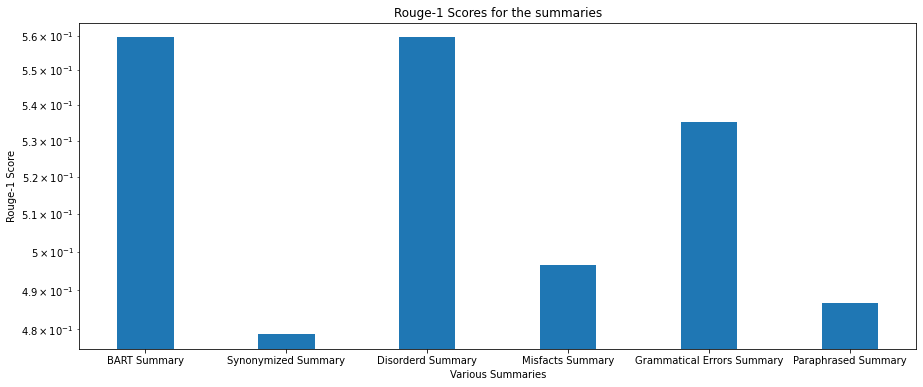

In [155]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 6))
plt.bar(x=['BART Summary','Synonymized Summary','Disorderd Summary','Misfacts Summary','Grammatical Errors Summary','Paraphrased Summary'], 
        height=[f_rouge1_bart,f_rouge1_syn,f_rouge1_ord,f_rouge1_misfact,f_rouge1_ungramm,f_rouge1_semacc],
        width = 0.4)
plt.title("Rouge-1 Scores for the summaries")
plt.xlabel("Various Summaries")
plt.ylabel("Rouge-1 Score")
plt.yscale("log")
plt.show()

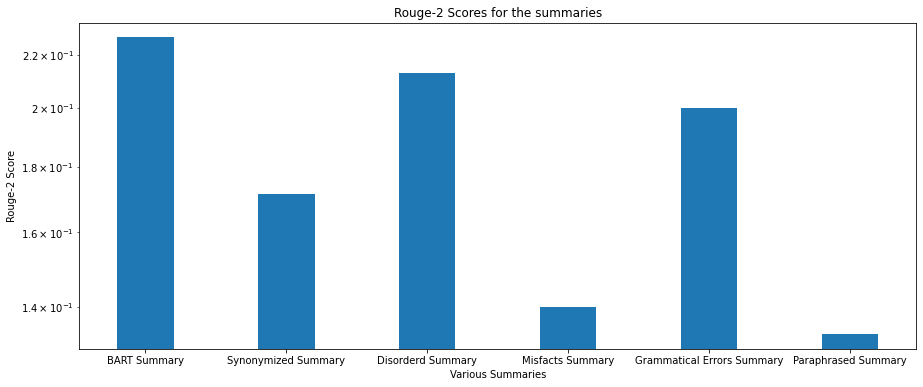

In [156]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 6))
plt.bar(x=['BART Summary','Synonymized Summary','Disorderd Summary','Misfacts Summary','Grammatical Errors Summary','Paraphrased Summary'], 
        height=[f_rouge2_bart,f_rouge2_syn,f_rouge2_ord,f_rouge2_misfact,f_rouge2_ungramm,f_rouge2_semacc],
        width = 0.4)
plt.title("Rouge-2 Scores for the summaries")
plt.xlabel("Various Summaries")
plt.ylabel("Rouge-2 Score")
plt.yscale("log")
plt.show()

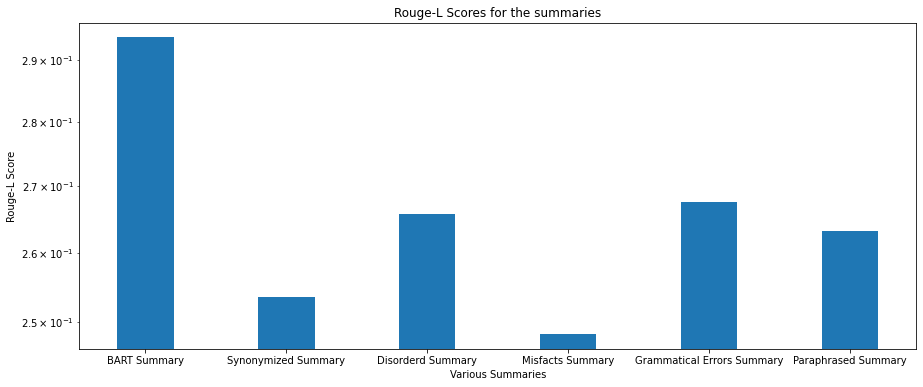

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 6))
plt.bar(x=['BART Summary','Synonymized Summary','Disorderd Summary','Misfacts Summary','Grammatical Errors Summary','Paraphrased Summary'], 
        height=[f_rougeL_bart,f_rougeL_syn,f_rougeL_ord,f_rougeL_misfact,f_rougeL_ungramm,f_rougeL_semacc],
        width = 0.4)
plt.title("Rouge-L Scores for the summaries")
plt.xlabel("Various Summaries")
plt.ylabel("Rouge-L Score")
plt.yscale("log")
plt.show()

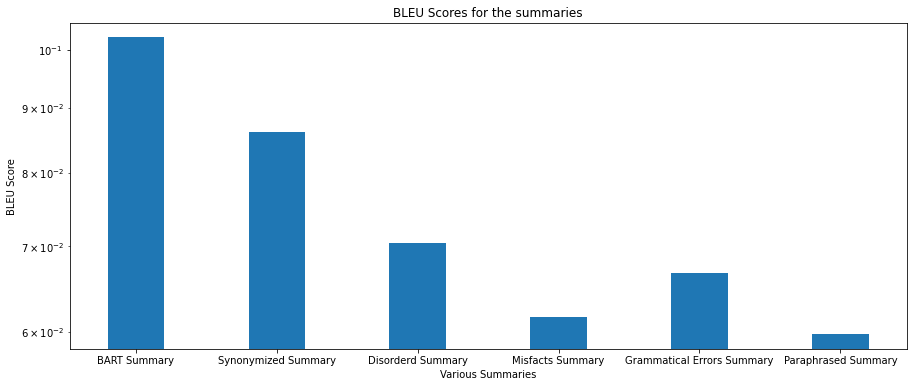

In [158]:
#import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 6))
plt.bar(x=['BART Summary','Synonymized Summary','Disorderd Summary','Misfacts Summary','Grammatical Errors Summary','Paraphrased Summary'], 
        height=[f_bleu_bart,f_bleu_syn,f_bleu_ord,f_bleu_misfact,f_bleu_ungramm,f_bleu_semacc],
        width = 0.4)
plt.title("BLEU Scores for the summaries")
plt.xlabel("Various Summaries")
plt.ylabel("BLEU Score")
plt.yscale("log")
#plt.yticks([0.3,0.6,0.9])
plt.show()

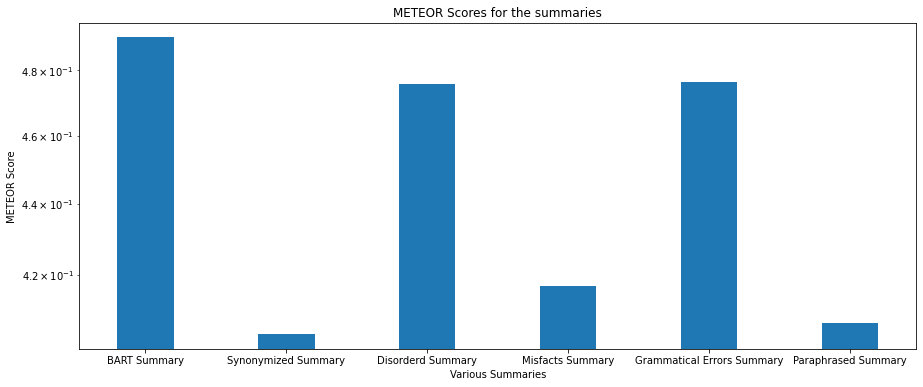

In [159]:
fig = plt.figure(figsize = (15, 6))
plt.bar(x=['BART Summary','Synonymized Summary','Disorderd Summary','Misfacts Summary','Grammatical Errors Summary','Paraphrased Summary'], 
        height=[f_meteor_bart,f_meteor_syn,f_meteor_ord,f_meteor_misfact,f_meteor_ungramm,f_meteor_semacc],
        width = 0.4)
plt.title("METEOR Scores for the summaries")
plt.xlabel("Various Summaries")
plt.ylabel("METEOR Score")
plt.yscale("log")
plt.show()

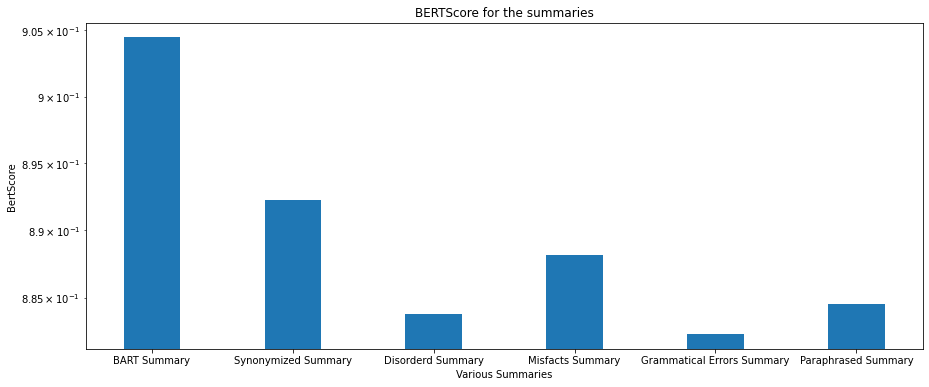

In [160]:
fig = plt.figure(figsize = (15, 6))
plt.bar(x=['BART Summary','Synonymized Summary','Disorderd Summary','Misfacts Summary','Grammatical Errors Summary','Paraphrased Summary'], 
        height=[f_bertscore_bart[0],f_bertscore_syn[0],f_bertscore_ord[0],f_bertscore_misfact[0],f_bertscore_ungramm[0],f_bertscore_semacc[0]],
        width = 0.4)
plt.title("BERTScore for the summaries")
plt.xlabel("Various Summaries")
plt.ylabel("BertScore")
#plt.yticks([0.3,0.6,0.9])
plt.yscale("log")
plt.show()

#### **4.7. Inference from the plots**

**Rouge:** <br>
 

1.   ROUGE-1, ROUGE-2 scores for the meaningless disorderd summary were almost same as that of the BART generated summary. In other words, according to R1 and R2, the disordered summary is as good as the meaningful and coherent BART generated summary, which is clearly not.
2.  Clearly all three Rouge scores gave good score for summary with grammatical errors.
3. Synonymized and Paraphrased summaries have performed worst according to the rouge scores. Which actually are better summaries.

**BLEU:** <br>
1. BLEU scored the synonymized summary better than other manipulated summaries. But a little worse than the BART generated summary, which shouldn't have been the case.
2. BLEU noticably scored the summary with misfacts and synonymized summary well.
3. But the BLEU couldn't judge the paraphrased summary

**METEOR** <br>
1. METEOR rated disorderd and grammatical error summaries high 
2. It didn't rate the synonymized and paraphrased summary well

**BERTScore** <br>
1. Clearly scored the disorderd and grammatical error summaries well
2. Score for the synonymized summary is not bad as well
3. But could not score the paraphrased summary properly.

### **5. Conclusion**
After infering from the abouve plots, we can conclude that BERTScore performed better overall as an evaluation metric


### **6. References**
https://huggingface.co/metrics  <br>
https://github.com/huggingface/datasets <br>
https://towardsdatascience.com/the-most-common-evaluation-metrics-in-nlp-ced6a763ac8b <br>
https://towardsdatascience.com/how-to-evaluate-text-generation-models-metrics-for-automatic-evaluation-of-nlp-models-e1c251b04ec1<br>
https://medium.com/analytics-vidhya/text-summarization-using-bert-gpt2-xlnet-5ee80608e961 <br>





MIT License

Copyright 2021 Kashyap Datta Kovvali

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.